In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(1622.5), np.float64(751.5), np.float64(-0.5))

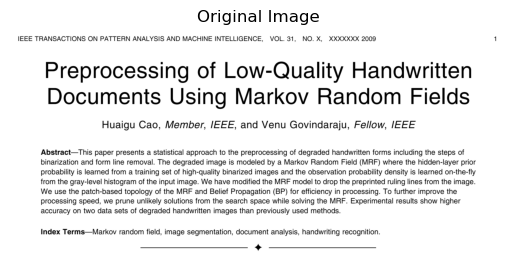

In [2]:
image_path = "doc.png"   # change image name if needed

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")


Convert to Binary (Black & White)

(np.float64(-0.5), np.float64(1622.5), np.float64(751.5), np.float64(-0.5))

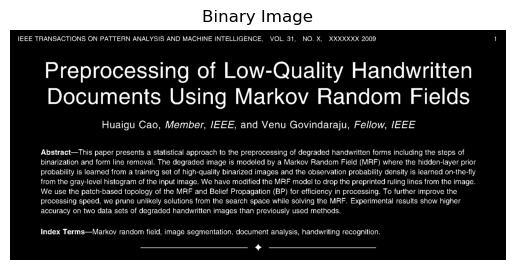

In [3]:
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap="gray")
plt.title("Binary Image")
plt.axis("off")


In [4]:
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary)

print("Total components detected:", num_labels - 1)


Total components detected: 1091


In [5]:
chars = []
boxes = []

for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    
    if area < 10:    # remove noise
        continue

    char = binary[y:y+h, x:x+w]
    char = cv2.resize(char, (20, 20))

    chars.append(char)
    boxes.append((x, y, w, h))


In [6]:
threshold = 0.2   # try 0.05, 0.2, 0.4

groups = []
group_ids = []


In [7]:
for i in range(len(chars)):
    placed = False

    for g in range(len(groups)):
        diff = cv2.absdiff(chars[i], groups[g][0])
        mse = np.mean(diff) / 255.0

        if mse < threshold:
            groups[g].append(chars[i])
            group_ids.append(g)
            placed = True
            break

    if not placed:
        groups.append([chars[i]])
        group_ids.append(len(groups) - 1)


In [8]:
print("Unique symbol groups found:", len(groups))


Unique symbol groups found: 60


In [9]:
reconstructed = np.ones_like(img) * 255

for i in range(len(chars)):
    x, y, w, h = boxes[i]
    proto = groups[group_ids[i]][0]
    proto = cv2.resize(proto, (w, h))

    reconstructed[y:y+h, x:x+w] = 255 - proto


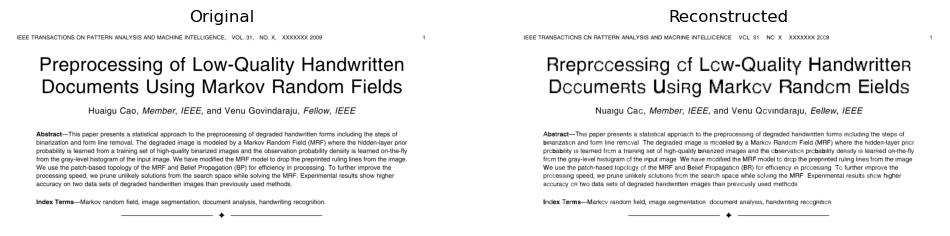

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Reconstructed")
plt.imshow(reconstructed, cmap="gray")
plt.axis("off")

plt.show()


Task 2

(np.float64(-0.5), np.float64(1622.5), np.float64(751.5), np.float64(-0.5))

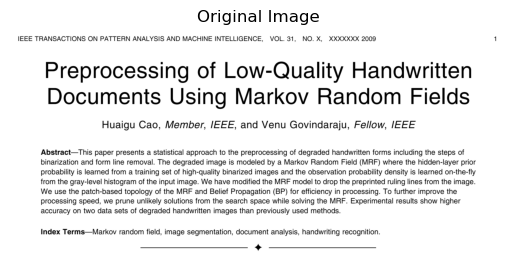

In [44]:
from skimage.metrics import structural_similarity as ssim

image_path = "doc.png"   # your document image

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")


In [45]:
qualities = [90, 70, 50, 30]   # JPEG quality levels
compressed_images = {}

for q in qualities:
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), q]
    _, enc = cv2.imencode(".jpg", img, encode_param)
    dec = cv2.imdecode(enc, cv2.IMREAD_GRAYSCALE)
    compressed_images[q] = dec


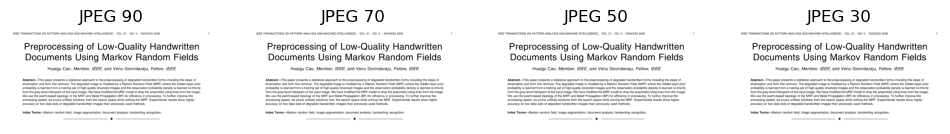

In [46]:
plt.figure(figsize=(12,6))

for i, q in enumerate(qualities):
    plt.subplot(1,4,i+1)
    plt.imshow(compressed_images[q], cmap="gray")
    plt.title(f"JPEG {q}")
    plt.axis("off")

plt.show()


In [47]:
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(255.0 / np.sqrt(mse))


In [48]:
print("Quality | PSNR | SSIM")
print("-----------------------")

for q in qualities:
    p = psnr(img, compressed_images[q])
    s = ssim(img, compressed_images[q])
    print(f"{q:7} | {p:.2f} | {s:.4f}")


Quality | PSNR | SSIM
-----------------------
     90 | 44.52 | 0.9964
     70 | 38.69 | 0.9851
     50 | 37.50 | 0.9766
     30 | 36.62 | 0.9655


In [53]:
edges = {}

for q in qualities:
    edges[q] = cv2.Canny(compressed_images[q], 100, 200)


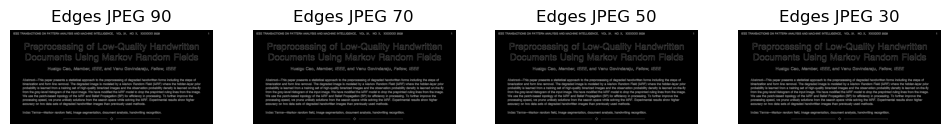

In [54]:
plt.figure(figsize=(12,6))

for i, q in enumerate(qualities):
    plt.subplot(1,4,i+1)
    plt.imshow(edges[q], cmap="gray")
    plt.title(f"Edges JPEG {q}")
    plt.axis("off")

plt.show()


## Task 3

(np.float64(-0.5), np.float64(1622.5), np.float64(751.5), np.float64(-0.5))

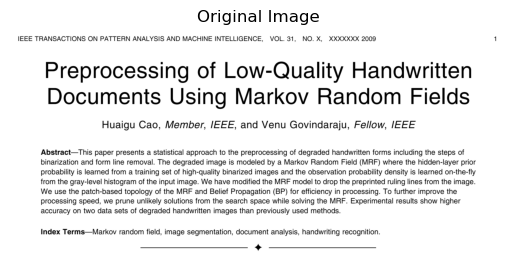

In [20]:
img = cv2.imread("doc.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")


In [21]:
cv2.imwrite("doc_lossless.png", img)

img_lossless = cv2.imread("doc_lossless.png", cv2.IMREAD_GRAYSCALE)


In [22]:
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 30]  # LOW quality
cv2.imwrite("doc_lossy.jpg", img, encode_param)

img_lossy = cv2.imread("doc_lossy.jpg", cv2.IMREAD_GRAYSCALE)


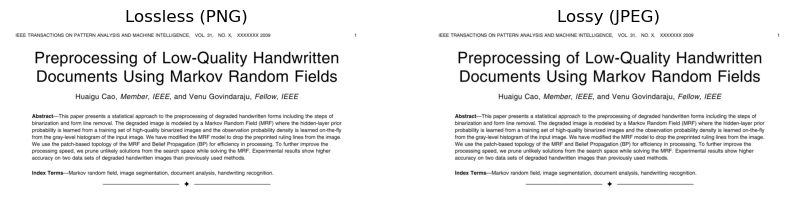

In [23]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_lossless, cmap="gray")
plt.title("Lossless (PNG)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_lossy, cmap="gray")
plt.title("Lossy (JPEG)")
plt.axis("off")

plt.show()


In [ ]:
def count_components(binary):
    num_labels, _, _, _ = cv2.connectedComponentsWithStats(binary)
    return num_labels - 1

In [26]:
# Convert both images to binary
_, bin_lossless = cv2.threshold(img_lossless, 127, 255, cv2.THRESH_BINARY)
_, bin_lossy    = cv2.threshold(img_lossy, 127, 255, cv2.THRESH_BINARY)

print("Binary images created successfully")

Binary images created successfully


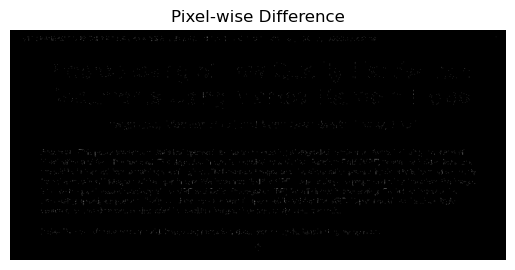

In [27]:
diff = cv2.absdiff(bin_lossless, bin_lossy)

plt.imshow(diff, cmap="gray")
plt.title("Pixel-wise Difference")
plt.axis("off")
plt.show()


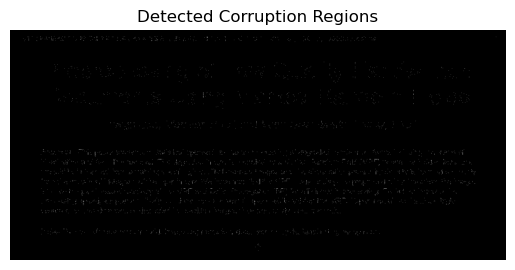

In [28]:
_, diff_bin = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)

plt.imshow(diff_bin, cmap="gray")
plt.title("Detected Corruption Regions")
plt.axis("off")
plt.show()


Task 4

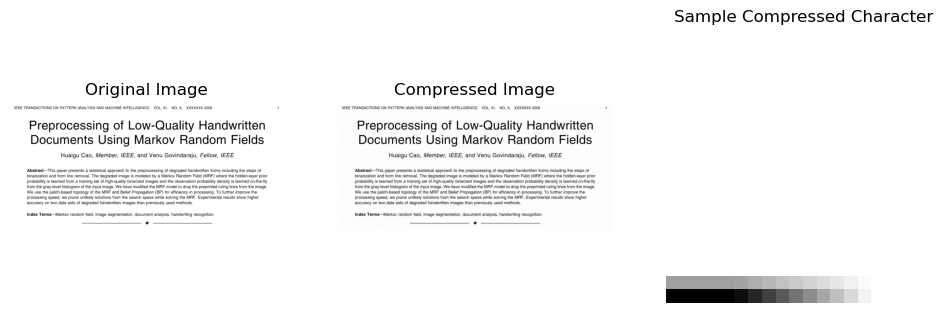

========== RESULTS ==========
Characters detected (Original): 1000
Characters detected (Compressed): 995
Recognition Accuracy (Original):  0.88
Recognition Accuracy (Compressed): 0.89

Failures (Compressed Image):
{'X': 111, '-': 302, 'I': 190, 'O': 392}


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1. LOAD ORIGINAL IMAGE
# -------------------------------------------------
img = cv2.imread("doc.png", cv2.IMREAD_GRAYSCALE)

# -------------------------------------------------
# 2. CREATE HEAVILY COMPRESSED IMAGE
# -------------------------------------------------
cv2.imwrite("doc_compressed.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 20])
img_comp = cv2.imread("doc_compressed.jpg", cv2.IMREAD_GRAYSCALE)

# -------------------------------------------------
# 3. BINARIZATION (OCR STYLE)
# -------------------------------------------------
_, bin_orig = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, bin_comp = cv2.threshold(img_comp, 127, 255, cv2.THRESH_BINARY_INV)

# -------------------------------------------------
# 4. CHARACTER EXTRACTION
# -------------------------------------------------
def extract_chars(binary):
    num_labels, _, stats, _ = cv2.connectedComponentsWithStats(binary)
    chars = []
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > 20:
            roi = binary[y:y+h, x:x+w]
            roi = cv2.resize(roi, (20, 20))
            chars.append(roi)
    return chars

chars_orig = extract_chars(bin_orig)
chars_comp = extract_chars(bin_comp)

# -------------------------------------------------
# 5. RULE-BASED CHARACTER RECOGNIZER
# -------------------------------------------------
def recognize_char(img):
    vertical = np.sum(img[:, 9:11] > 0)
    horizontal = np.sum(img[9:11, :] > 0)

    contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    holes = 0
    if hierarchy is not None:
        for h in hierarchy[0]:
            if h[3] != -1:
                holes += 1

    if holes >= 1:
        return "O"
    elif vertical > horizontal:
        return "I"
    elif horizontal > vertical:
        return "-"
    else:
        return "X"   # failure / unknown

# -------------------------------------------------
# 6. RECOGNITION
# -------------------------------------------------
pred_orig = [recognize_char(c) for c in chars_orig]
pred_comp = [recognize_char(c) for c in chars_comp]

# -------------------------------------------------
# 7. ACCURACY MEASUREMENT
# -------------------------------------------------
def accuracy(pred):
    correct = sum(1 for p in pred if p != "X")
    return correct / len(pred) if len(pred) > 0 else 0

acc_orig = accuracy(pred_orig)
acc_comp = accuracy(pred_comp)

# -------------------------------------------------
# 8. FAILURE ANALYSIS
# -------------------------------------------------
failures = {}
for p in pred_comp:
    failures[p] = failures.get(p, 0) + 1

# -------------------------------------------------
# 9. VISUAL COMPARISON
# -------------------------------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_comp, cmap="gray")
plt.title("Compressed Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(chars_comp[0], cmap="gray")
plt.title("Sample Compressed Character")
plt.axis("off")

plt.show()

# -------------------------------------------------
# 10. PRINT RESULTS
# -------------------------------------------------
print("========== RESULTS ==========")
print("Characters detected (Original):", len(chars_orig))
print("Characters detected (Compressed):", len(chars_comp))
print("Recognition Accuracy (Original): ", round(acc_orig, 2))
print("Recognition Accuracy (Compressed):", round(acc_comp, 2))
print("\nFailures (Compressed Image):")
print(failures)


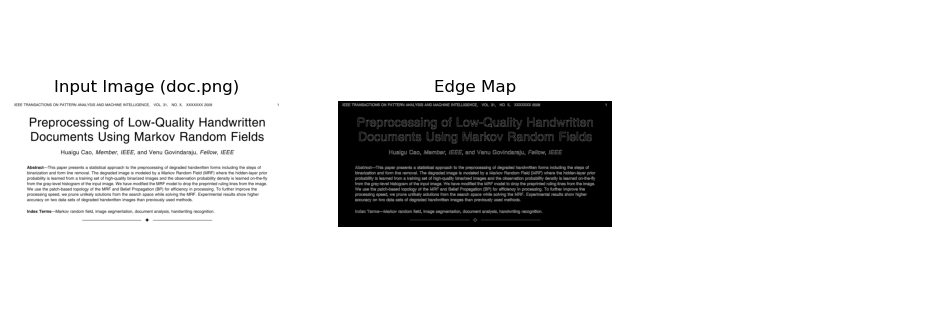

===== SAFE COMPRESSION ANALYSIS =====
Image: doc.png
Entropy: 1.34
Edge Density: 0.064
Connected Components: 1091
Final Decision: LOSSLESS COMPRESSION
Reason: Text-heavy document with many characters


In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import shannon_entropy

# ---------------------------------------------
# LOAD IMAGE (doc.png)
# ---------------------------------------------
image_path = "doc.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("doc.png not found!")

# ---------------------------------------------
# 1. ENTROPY
# ---------------------------------------------
entropy = shannon_entropy(img)

# ---------------------------------------------
# 2. EDGE DENSITY
# ---------------------------------------------
edges = cv2.Canny(img, 100, 200)
edge_density = np.sum(edges > 0) / edges.size

# ---------------------------------------------
# 3. CONNECTED COMPONENT COUNT
# ---------------------------------------------
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
num_labels, _, stats, _ = cv2.connectedComponentsWithStats(binary)
cc_count = num_labels - 1   # remove background

# ---------------------------------------------
# 4. SAFE COMPRESSION DECISION RULE
# ---------------------------------------------
if cc_count > 500 and edge_density > 0.05:
    decision = "LOSSLESS COMPRESSION"
    reason = "Text-heavy document with many characters"
elif edge_density > 0.04 and entropy < 5:
    decision = "NO COMPRESSION"
    reason = "Critical document (forms / fine lines)"
else:
    decision = "LOSSY COMPRESSION"
    reason = "Low risk of structural damage"

# ---------------------------------------------
# 5. SHOW RESULTS
# ---------------------------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Input Image (doc.png)")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(edges, cmap="gray")
plt.title("Edge Map")
plt.axis("off")

plt.subplot(1,3,3)

plt.axis("off")

plt.show()

# ---------------------------------------------
# 6. PRINT SUMMARY (FOR EXAM OUTPUT)
# ---------------------------------------------
print("===== SAFE COMPRESSION ANALYSIS =====")
print("Image:", image_path)
print("Entropy:", round(entropy, 2))
print("Edge Density:", round(edge_density, 3))
print("Connected Components:", cc_count)
print("Final Decision:", decision)
print("Reason:", reason)
